# REINFORCEMENT LEARNING MEETUP

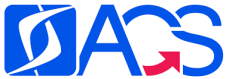
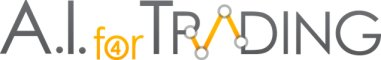
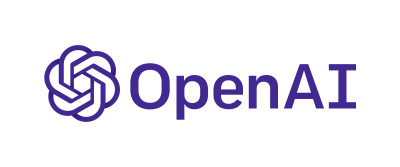

# OpenAI Gym - Introduction

Gym is a toolkit for developing and comparing reinforcement learning algorithms. It makes no assumptions about the structure of your agent, and is compatible with any numerical computation library, such as TensorFlow or Theano.  

To install gym simply run on the terminal:  

```pip install gym ```

**Why Gym?**

Reinforcement learning (RL) is the subfield of machine learning concerned with decision making and motor control. It studies how an agent can learn how to achieve goals in a complex, uncertain environment. RL algorithms have started to achieve good results in many difficult environments and in increasing complex problems.
However, RL research is also slowed down by two factors:

* The need for better benchmark  
* Lack of standardization of environments used in publications. This issue makes it difficult to reproduce published research and compare result from different papers

Gym is an attempt to fix both problems.

### The environment

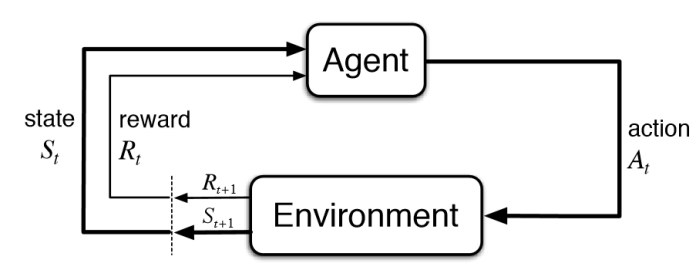

The environment is the base structure in which the Gym runs.
The agent interacts with the environment by doing actions and receiving the next observation as output.  

Gym comes with a lot of **predefined and ready-to-use environment**.

Here's an example of the instantiation of one of the default gym environment:

In [1]:
import gym
import time

num_episodes = 1
done = False

env = gym.make('MsPacman-v0')
for i_episode in range(num_episodes):
    observation = env.reset()
    while not done:
        env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        time.sleep(0.05)
        if done:
            print("Episode finished")
            break
env.close()

Episode finished


Let's analyze the methods called:

** gym.make('env-id') **  
It allows the building of the environment by passing its ID.  

** env.reset( ) **  
It allows to reset the environment to the initial state.  

** env.render( ) **  
It render the environment. Useful for visualization purposes.  

** env.step( ) **  
Perform an action inside the environment. This method returns four values as output.  
* observation: the next state of the environment.
* reward: amount of reward achieved by the previous action. The scale varies between environments, but the goal is always to increase your total reward.  
* done: whether it’s time to reset the environment again. Most (but not all) tasks are divided up into well-defined episodes, and done being True indicates the episode has terminated.  
* info:  diagnostic information useful for debugging.

So a more proper way of writing the previous code would be to respect the done flag:

### Spaces  
In the examples above, we’ve been sampling random actions from the environment’s action space (i.e. ```env.action_space.sample()```). But what actually are those actions? Every environment comes with an ** action_space ** and an ** observation_space **. These attributes are of type Space, and they describe the format of valid actions the environment can manage and of observations the environment will return:

In [2]:
import gym
env = gym.make('MsPacman-v0')
print('Action Space: {}'.format(env.action_space))
print('Observation Space: {}'.format(env.observation_space))

Action Space: Discrete(9)
Observation Space: Box(210, 160, 3)


** Discrete(n) **  
The Discrete space allows a fixed range of non-negative numbers, so in this case valid actions are numbers in between 0 and 4.

**Box(low, high, shape, dtype) **  
The Box space represents a sub space in $\mathbb{R}^{n}$ that describe the shape of the observation space.
Low refers to the lower bound of the observation, high to the upper bound of the observation, shape to the shape of the observation and dtype to the data type allowed. Calling env.observation_space returns the shape of the observation space. 

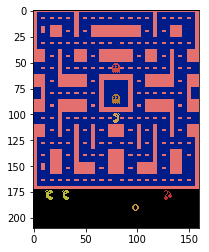

In [4]:
import matplotlib.pyplot as plt
obs = env.reset()
plt.imshow(obs)
plt.show()

In Breakout observation space will be a box of shape (210,160,3).  
This is actually the dimension of the game frame that will be passed as observation.  

* Height: 210  
* Width: 160  
* Channels (r,g,b): 3  

# OpenAI Baselines

OpenAI Baselines is a set of high-quality implementations of reinforcement learning algorithms.

These algorithms will make it easier for the research community to replicate, refine, and identify new ideas, and will create good baselines to build research on top of.  

They can be **installed** by following the instruction on this link:  

https://github.com/openai/baselines

## Reinforcement Learning Algorithm  

Algorithm implemented in OpenAI baselines are:  

* A2C: https://arxiv.org/abs/1602.01783  
* ACER: https://arxiv.org/abs/1611.01224   
* ACKTR: https://arxiv.org/abs/1708.05144  
* DDPG: https://arxiv.org/abs/1509.02971  
* ** DQN: https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf  **
* GAIL: https://arxiv.org/abs/1606.03476  
* HER: https://arxiv.org/abs/1707.01495  
* PPO: https://arxiv.org/abs/1707.06347 
* TRPO: https://arxiv.org/abs/1502.05477

In particular, here we will show the performance of the Deep Q Network which we introduced before in the theory part.

**DQN - Deep Q Network**  
DQN algorithm aim to overcome too large memory and computation requirement for computing the Q function when the combination of states and actions are too large. To address that the DQN algorithm switch to a deep neural network to approximate $Q(s,a)$. With this new approach we generalize the approximation of the Q-value function rather than remembering the solutions.

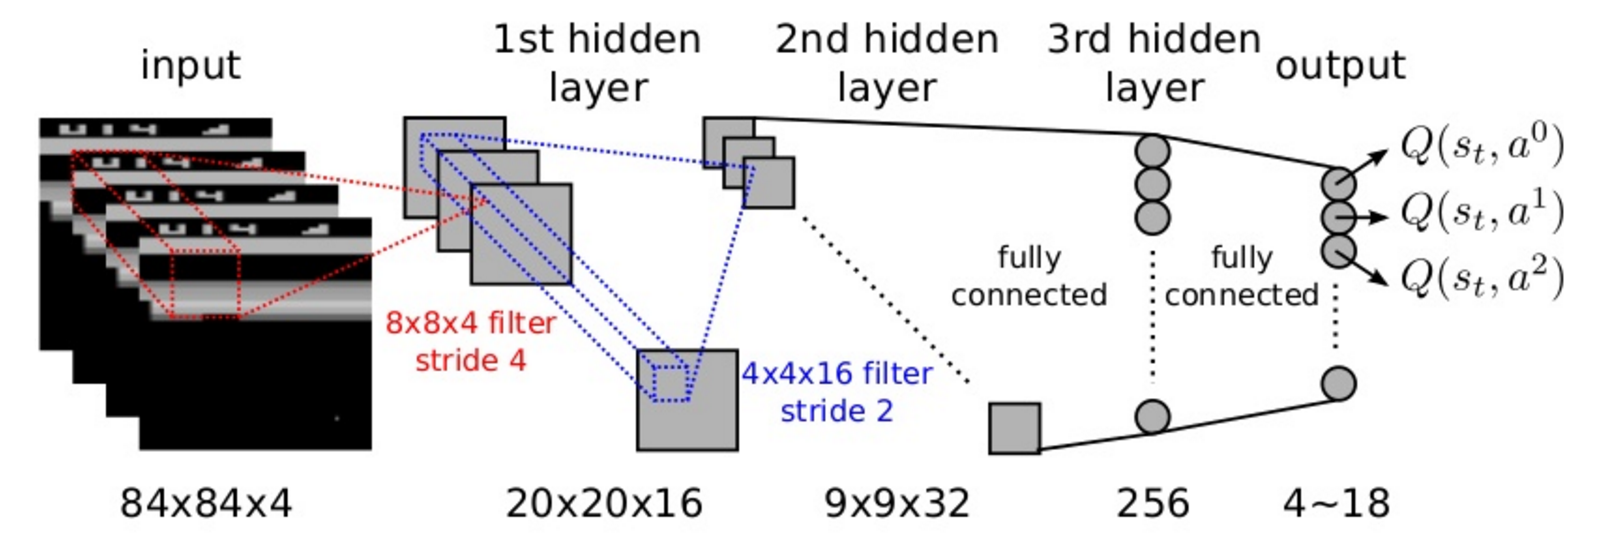

### How to use OpenAI baselines  

The most easy way to run openAI baselines algorithms is through the command line (ubuntu). You can simply train an agent in an environment by running:  

``` python -m baselines.run --alg=<name of the algorithm> --env=<environment_id> --num_timesteps=<number of steps for training> [additional arguments] ```  

Additional arguments might differ from one algorithm to another. Some possible parameters typically are:   

* Type of network (mlp, lstm, cnn)
* Number of layers  
* Number of hidden units  
* Batch size  
* Learning rate  
* Gamma  
* Log path
* etc...  

It is possible to ** save ** the model and ** load ** an already trained one by adding in the runner the following parameters:  

``` --save_path=<path where to save the model>  ```  
``` --load_path=<path where to load the model>  ```

When we have a trained model we can run it and visualize its performance in this way:  

``` python -m baselines.run --alg=<name of the algorithm> --env=<environment_id> --num_timesteps=0 --load_path=<path where the model is saved> --play [additional arguments] ``` 

### Training an agent - An example:  

We will train our agent using the Deep Q Network. In the baselines runner we need to set:  

```--alg=deepq```

Since we are dealing with raw pixels as input we will use a convolutional neural network. Just implement it by setting the network parameter:  

```--network=cnn```

We will train our model for 1e7 timesteps (this means that the step method inside the environment will be called 1e7 times).  

In order to define the logging folder we set an environment variable called:  

```OPENAI_LOGDIR=path/to/save/logging```  

In [4]:
%set_env OPENAI_LOGDIR=./log_folder
%set_env OPENAI_LOG_FORMAT=csv,stdout,tensorboard
!python -m baselines.run --network=cnn --alg=deepq --env=MsPacmanNoFrameskip-v0 --num_timesteps=1e7 --save_path=ms_pacman_2019_10_01

env: OPENAI_LOGDIR=./log_folder
env: OPENAI_LOG_FORMAT=csv,stdout,tensorboard
Logging to ./log_folder
Logging to ./log_folder
env_type: atari
Training deepq on atari:MsPacmanNoFrameskip-v0 with arguments 
{'network': 'cnn', 'lr': 0.0001, 'buffer_size': 10000, 'exploration_fraction': 0.1, 'exploration_final_eps': 0.01, 'train_freq': 4, 'learning_starts': 10000, 'target_network_update_freq': 1000, 'gamma': 0.99, 'prioritized_replay': True, 'prioritized_replay_alpha': 0.6, 'checkpoint_freq': 10000, 'checkpoint_path': None, 'dueling': True}
2019-10-01 09:37:22.253615: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
/home/agsuser/Desktop/virtualenv-experiment/venv-experiment/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/agsuser/Desktop/virtualenv-experiment/venv-experiment/lib/python3.6/site-packages/numpy/core/_metho

--------------------------------------
| % time spent exploring  | 52       |
| episodes                | 2900     |
| mean 100 episode reward | 12.6     |
| steps                   | 482984   |
--------------------------------------
Saving model due to mean reward increase: 12.5 -> 14.7
--------------------------------------
| % time spent exploring  | 50       |
| episodes                | 3000     |
| mean 100 episode reward | 14.8     |
| steps                   | 501822   |
--------------------------------------
Saving model due to mean reward increase: 14.7 -> 15.7
--------------------------------------
| % time spent exploring  | 48       |
| episodes                | 3100     |
| mean 100 episode reward | 14.4     |
| steps                   | 520363   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 46       |
| episodes                | 3200     |
| mean 100 episode reward | 13.7     |
| steps                   | 5384

Saving model due to mean reward increase: 26.7 -> 27.7
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 5900     |
| mean 100 episode reward | 27.5     |
| steps                   | 1130511  |
--------------------------------------
Saving model due to mean reward increase: 27.7 -> 28.0
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 6000     |
| mean 100 episode reward | 26.8     |
| steps                   | 1154542  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 6100     |
| mean 100 episode reward | 28.1     |
| steps                   | 1177950  |
--------------------------------------
Saving model due to mean reward increase: 28.0 -> 28.3
Saving model due to mean reward increase: 28.3 -> 29.9
Saving model due to mean reward increase: 29.9 -> 30.2
-----------------------

--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 9300     |
| mean 100 episode reward | 28.2     |
| steps                   | 1971507  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 9400     |
| mean 100 episode reward | 29.3     |
| steps                   | 1997097  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 9500     |
| mean 100 episode reward | 29.8     |
| steps                   | 2022489  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 9600     |
| mean 100 episode reward | 29.1     |
| steps                   | 2049312  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 12800    |
| mean 100 episode reward | 30       |
| steps                   | 2853630  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 12900    |
| mean 100 episode reward | 27.4     |
| steps                   | 2877747  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 13000    |
| mean 100 episode reward | 30.4     |
| steps                   | 2902208  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 13100    |
| mean 100 episode reward | 27.4     |
| steps                   | 2925428  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 16400    |
| mean 100 episode reward | 28       |
| steps                   | 3752180  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 16500    |
| mean 100 episode reward | 24.5     |
| steps                   | 3774373  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 16600    |
| mean 100 episode reward | 25.5     |
| steps                   | 3797802  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 16700    |
| mean 100 episode reward | 28.8     |
| steps                   | 3821900  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 20000    |
| mean 100 episode reward | 29.9     |
| steps                   | 4636387  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 20100    |
| mean 100 episode reward | 27.8     |
| steps                   | 4660493  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 20200    |
| mean 100 episode reward | 29       |
| steps                   | 4685047  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 20300    |
| mean 100 episode reward | 30.5     |
| steps                   | 4710528  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 23600    |
| mean 100 episode reward | 29.9     |
| steps                   | 5521662  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 23700    |
| mean 100 episode reward | 28.8     |
| steps                   | 5546261  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 23800    |
| mean 100 episode reward | 29.8     |
| steps                   | 5571471  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 23900    |
| mean 100 episode reward | 29.3     |
| steps                   | 5596395  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 27100    |
| mean 100 episode reward | 27.2     |
| steps                   | 6405996  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 27200    |
| mean 100 episode reward | 26.2     |
| steps                   | 6429060  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 27300    |
| mean 100 episode reward | 30.8     |
| steps                   | 6455284  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 27400    |
| mean 100 episode reward | 31.4     |
| steps                   | 6482320  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 30600    |
| mean 100 episode reward | 28.4     |
| steps                   | 7295254  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 30700    |
| mean 100 episode reward | 27       |
| steps                   | 7319101  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 30800    |
| mean 100 episode reward | 30.7     |
| steps                   | 7344898  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 30900    |
| mean 100 episode reward | 30.6     |
| steps                   | 7370479  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 34200    |
| mean 100 episode reward | 31       |
| steps                   | 8205731  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 34300    |
| mean 100 episode reward | 31.1     |
| steps                   | 8231381  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 34400    |
| mean 100 episode reward | 31.2     |
| steps                   | 8256397  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 1        |
| episodes                | 34500    |
| mean 100 episode reward | 29.9     |
| steps                   | 8282569  |
--------------------------------------
--------------------------------------
| % time spent exploring 

### Visualizing Training  

By default, all summary data, including progress is saved to a unique directory in a temp folder. If no log path is specified log folder will be /tmp/openai-datetime.  The directory can be changed with the ```--log_path``` command-line option. Another way the temp directory can be changed is through the use of the $OPENAI_LOGDIR environment variable.

Training stats will be logged in progress.csv.

** EXAMPLE: **

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('log_folder/progress.csv')
df.head()

,% time spent exploring,episodes,mean 100 episode reward,steps
0,98,100,8.4,16382
1,96,200,7.8,32343
2,95,300,8.7,48908
3,93,400,7.6,64120
4,92,500,8.3,79842


### Logging info  

Summary data provide a lot of useful information about the training. Some of them are specific to the algorithm while others are common:  

* ** % time spent exploring: **  
Percentage of time the agent spend exploring random actions instead of exploiting its policy. It decrease over time.  


* ** episodes: **  
Number of episodes played.  


* ** mean 100 episode reward: **  
Mean reward obtained by the agent every 100 episodes.  


* ** steps: **  
Number of training steps.

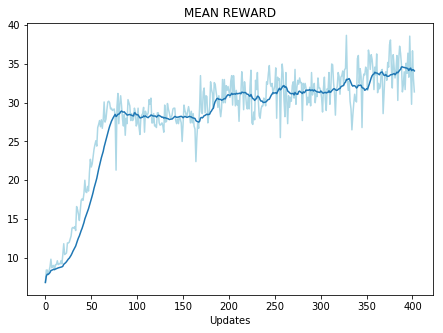

In [15]:
plt.figure(figsize=(16,5))

plt.subplot(121)
plt.plot(df['mean 100 episode reward'], alpha = 1, color = 'lightblue')
plt.plot(df['mean 100 episode reward'].rolling(20, min_periods = 1).mean())
plt.title('MEAN REWARD')
plt.xlabel('Updates')

plt.show()

### Watch the model in action!

In [1]:
!python -m baselines.run_play_slow --network=cnn --num_env=1 --alg=deepq --env=MsPacmanNoFrameskip-v0 --num_timesteps=0 --load_path=models/mspacman_model0 --play

Logging to /tmp/openai-2019-10-02-16-46-25-327365
Logging to /tmp/openai-2019-10-02-16-46-25-584019
env_type: atari
Training deepq on atari:MsPacmanNoFrameskip-v0 with arguments 
{'network': 'cnn', 'lr': 0.0001, 'buffer_size': 10000, 'exploration_fraction': 0.1, 'exploration_final_eps': 0.01, 'train_freq': 4, 'learning_starts': 10000, 'target_network_update_freq': 1000, 'gamma': 0.99, 'prioritized_replay': True, 'prioritized_replay_alpha': 0.6, 'checkpoint_freq': 10000, 'checkpoint_path': None, 'dueling': True, 'load_path': 'models/mspacman_model0'}
2019-10-02 16:46:27.628902: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Loaded model from models/mspacman_model0
Running trained model
^C
Traceback (most recent call last):
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(cod